##Tarea##

In [2]:
# Librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy==1.26.4

Enhanced Machine Learning Models for Churn Prediction and Retention Analysis

In [ ]:
# Reads data from PB1
QUERY = "SELECT * FROM SCHEMA.TABLE"
data = hana.read_data(QUERY)

**Introducción a los Datos y Objetivo del Modelo**

El presente estudio se enfoca en el análisis de datos provenientes de una compañía de fertilizantes, cuyo objetivo principal es desarrollar un modelo de machine learning que asigne una probabilidad de churn (fuga) a cada cliente, basado en sus características y comportamiento histórico de compra. La implementación de este modelo permitiría identificar a aquellos clientes con mayor riesgo de abandono, permitiendo a la empresa concentrar sus esfuerzos en retener a estos clientes mediante intervenciones específicas.

Los datos empleados en este análisis incluyen múltiples características relevantes de los clientes, como las fechas de compra, la cantidad de ventas (SalesQuantityIP), el código del pais, y los identificadores únicos de los clientes. Estos datos son fundamentales para capturar el comportamiento de compra a lo largo del tiempo y detectar patrones que puedan predecir la probabilidad de churn.

In [27]:
#importamos los datos en la ruta
df_chrun = pd.read_csv('C:/Users/a843931/OneDrive - Yara International ASA/Documents/Maestria analisis de dato/Series de tiempo/Series de tiempo Python/Data_base/Data_base_chrun.csv')
df__chrun_BP01 = df_chrun[df_chrun['CompanyCode'] == 'BP01']

In [28]:
display(df__chrun_BP01)

,ActualGIDate_Date,Year,CompanyCode,SalesQuantityIP
0,2019-10-31,2019,BP01,0.30
1,2019-10-30,2019,BP01,1.20
2,2019-10-04,2019,BP01,2.25
3,2019-10-04,2019,BP01,3.00
4,2019-10-04,2019,BP01,7.20
...,...,...,...,...
429218,2019-10-21,2019,BP01,2.10
429219,2019-10-04,2019,BP01,1.50
429220,2019-10-03,2019,BP01,1.50
429221,2019-10-25,2019,BP01,4.50


**Analisis exploratorio de las ventas**

In [29]:
# 1. Descripción general del conjunto de datos
print("### Descripción general del conjunto de datos ###")
print(df__chrun_BP01.info())  # Información sobre tipos de datos y valores nulos
print("\n### Resumen estadístico ###")
print(df__chrun_BP01.describe()) 

### Descripción general del conjunto de datos ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429223 entries, 0 to 429222
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ActualGIDate_Date  429223 non-null  object 
 1   Year               429223 non-null  int64  
 2   CompanyCode        429223 non-null  object 
 3   SalesQuantityIP    429223 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ MB
None

### Resumen estadístico ###
                Year  SalesQuantityIP
count  429223.000000    429223.000000
mean     2020.820466         3.135723
std         2.014494        22.900055
min      2018.000000         0.000010
25%      2019.000000         0.570000
50%      2021.000000         1.500000
75%      2023.000000         3.225000
max      2024.000000      7800.000000


In [30]:
# 2. Análisis de valores faltantes
print("\n### Valores faltantes ###")
missing_values = df__chrun_BP01.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar columnas con valores faltantes


### Valores faltantes ###
Series([], dtype: int64)


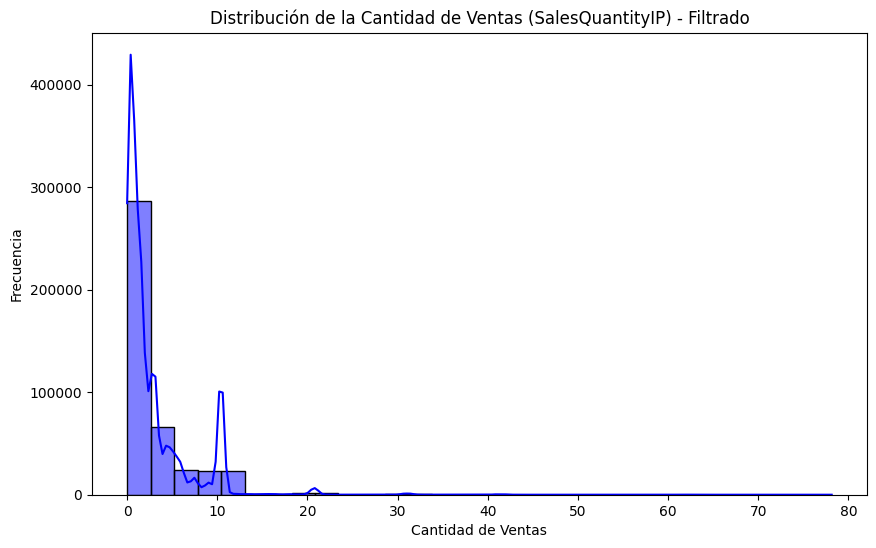

In [31]:
df_filtered = df__chrun_BP01[df__chrun_BP01['SalesQuantityIP'] < 80]

# Crear el gráfico de distribución de nuevo
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['SalesQuantityIP'], kde=True, color='blue', bins=30)
plt.title('Distribución de la Cantidad de Ventas (SalesQuantityIP) - Filtrado')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Frecuencia')
plt.show()

gráfico muestra que las ventas se concentra en volúmenes pequeños, lo que sugiere un comportamiento de compra basado en necesidades puntuales o en clientes que tienden a comprar frecuentemente pero en pequeñas cantidades. Esta tendencia es consistente con productos como los fertilizantes líquidos, ya que estos yaraVitas son muy costosos peor muy eficiente.

**Comportamiento a travez del tiempo**

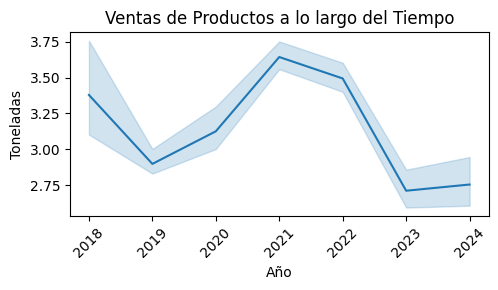

In [32]:
# Cambio del tipo de bariable
df__chrun_BP01['ActualGIDate_Date'] = pd.to_datetime(df__chrun_BP01['ActualGIDate_Date'])

# Gráfico de líneas
plt.figure(figsize=(5,3))
sns.lineplot(data=df_chrun, x='Year', y='SalesQuantityIP')
plt.title('Ventas de Productos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Toneladas')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

El gráfico de ventas de productos a lo largo del tiempo muestra una tendencia general de fluctuación entre 2018 y 2024. Observamos que las ventas han variado entre 9 y 12 millones de toneladas y litros, los cuales se debe hacer una limpieza y estandarizar con que unidades se va a trabajar.

C:\Users\a843931\AppData\Local\Temp\ipykernel_36956\3464508068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df__chrun_BP01, x='Year', y='SalesQuantityIP', palette='viridis')
c:\Users\a843931\AppData\Local\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\a843931\AppData\Local\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

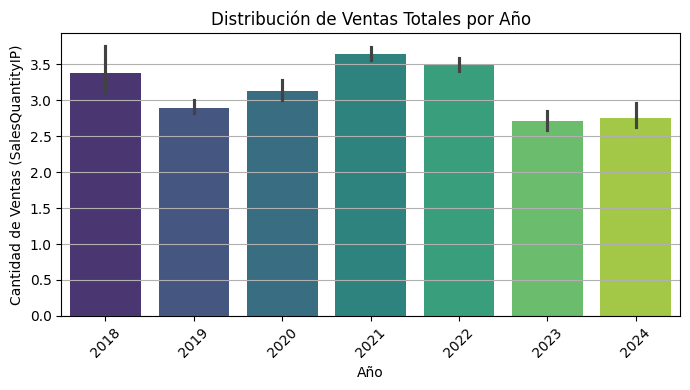

In [33]:
# Crear el gráfico de barras para mostrar las ventas por año
plt.figure(figsize=(7,4))
sns.barplot(data=df__chrun_BP01, x='Year', y='SalesQuantityIP', palette='viridis')
plt.title('Distribución de Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ventas (SalesQuantityIP)')
plt.xticks(rotation=45)  
plt.grid(True, axis='y')  
plt.tight_layout()  
plt.show()


Este gráfico muestra claramente las fluctuaciones en las ventas a lo largo de los años. El pico de ventas en 2021 es un aspecto que se puede analizar de su alza, mientras que el descenso observado en 2023 y 2024 podría sugerir la necesidad de estrategias para mantener la retención de clientes o incrementar las ventas en esos años.

*Conclusion*
El uso combinado de XGBoost como modelo base y las Multi-Scale Transformer Pyramid Networks como modelo avanzado permitirá generar predicciones más precisas y estratégicas. Mientras que XGBoost proporciona una solución probada y confiable, el enfoque innovador de Transformer Networks aporta una mayor capacidad para modelar series temporales multivariadas, capturando de manera efectiva el comportamiento dinámico de los clientes a lo largo del tiempo. Esto brindará a la compañía de fertilizantes la posibilidad de anticipar comportamientos futuros y tomar medidas proactivas para reducir el churn y mejorar la retención de clientes.